In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
bigg_boss = pd.read_csv('Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 568 rows and 21 columns


In [3]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,...,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,0.0


In [4]:
bigg_boss.tail(10).T

,558,559,560,561,562,563,564,565,566,567
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,2,2,2,2,2,2,2,2,2,2
Name,Rajith Kumar,Reshma Raj/Nair,Saju Navodaya,Somadas,Sujo Mathew,Suresh Krishnan,Thesni Khan,Veena Nair,Daya Ashwathy/Achu,Jasla Madassery
Profession,Activist,Model,Actor,Singer,Model,Film Director,Actress,Actress,Social Media Star,Activist
Gender,Male,Female,Male,Male,Male,Male,Female,Female,Female,Female
Entry Date,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,26-Jan-20,26-Jan-20
Elimination Date,NaN,NaN,NaN,NaN,NaN,26-Jan-20,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN
Wild Card,No,No,No,No,No,No,No,No,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [5]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 21 columns):
Language                              568 non-null object
Season Number                         568 non-null int64
Name                                  568 non-null object
Profession                            568 non-null object
Gender                                568 non-null object
Entry Date                            490 non-null object
Elimination Date                      105 non-null object
Elimination Week Number               465 non-null float64
Wild Card                             568 non-null object
Season Length                         568 non-null int64
Number of Housemates                  568 non-null int64
Season Start Date                     568 non-null object
Season End Date                       568 non-null object
Host Name                             568 non-null object
Prize Money (INR)                     546 non-null object
Broadcasted By             

In [6]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Winner
count,568.000000,465.000000,568.000000,568.000000,371.000000,506.000000,520.000000,504.000000,546.000000
mean,4.640845,8.982796,101.908451,17.957746,5.660728,3.970356,0.084615,0.539683,0.054945
std,3.598141,4.618148,11.198327,1.909313,2.576981,2.804012,0.292082,0.745038,0.228082
min,1.000000,1.000000,70.000000,15.000000,2.720000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,98.000000,17.000000,3.540000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,9.000000,100.000000,18.000000,4.700000,3.500000,0.000000,0.000000,0.000000
75%,7.000000,14.000000,105.000000,19.250000,7.900000,6.000000,0.000000,1.000000,0.000000
max,13.000000,18.000000,140.000000,22.000000,11.030000,13.000000,2.000000,5.000000,1.000000


In [7]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 13
Number of unique values in Name - 566
Number of unique values in Profession - 74
Number of unique values in Gender - 3
Number of unique values in Entry Date - 38
Number of unique values in Elimination Date - 56
Number of unique values in Elimination Week Number - 18
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 13
Number of unique values in Number of Housemates - 7
Number of unique values in Season Start Date - 32
Number of unique values in Season End Date - 30
Number of unique values in Host Name - 15
Number of unique values in Prize Money (INR) - 4
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 20
Number of unique values in Number of Evictions Faced - 14
Number of unique values in Number of re-entries - 3
Number of unique values in Number of times elected as Captain - 6
Number of unique values in Winner - 2


In [8]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 32 seasons happened (including current seasons)

32


In [9]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        13
Kannada       7
Tamil         3
Telugu        3
Bengali       2
Malayalam     2
Marathi       2
Name: Season Number, dtype: int64


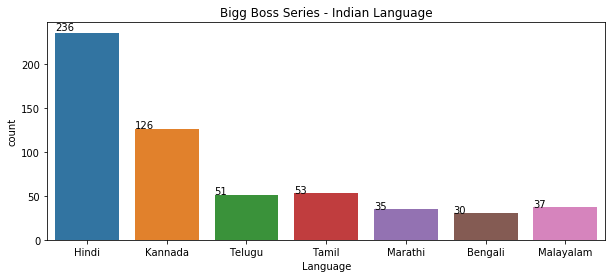

In [10]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

No     480
Yes     88
Name: Wild Card, dtype: int64 

No     85.0
Yes    15.0
Name: Wild Card, dtype: float64


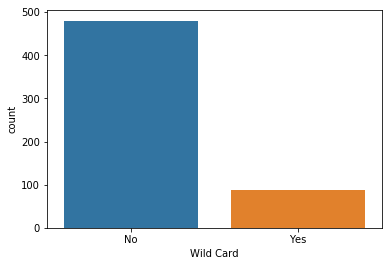

In [11]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

In [12]:
# Common people has many professions, so clubbing them into one category
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession']='Commoner'

Actress                  133
Actor                     95
Model                     41
Soap Actress              40
Commoner                  39
Singer                    30
Soap Actor                27
TV Anchor                 19
Reality Show Alumni       16
Comedian                  13
Radio Jockey              11
News Presenter            10
Sports Person              7
Choreographer              7
Social Media Star          6
International Star         6
Film Director              6
LGBT                       5
Producer                   4
Politician                 4
Activist                   4
Swamiji                    4
Pageant Winner             4
Controversial Fame         4
Wrestler                   3
Stage Actress              2
Journalist                 2
Video Jockey               2
Dancer                     2
Businessman                2
Fashion Designer           2
Chef                       1
Lyricist                   1
Air Hostess                1
Writer        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

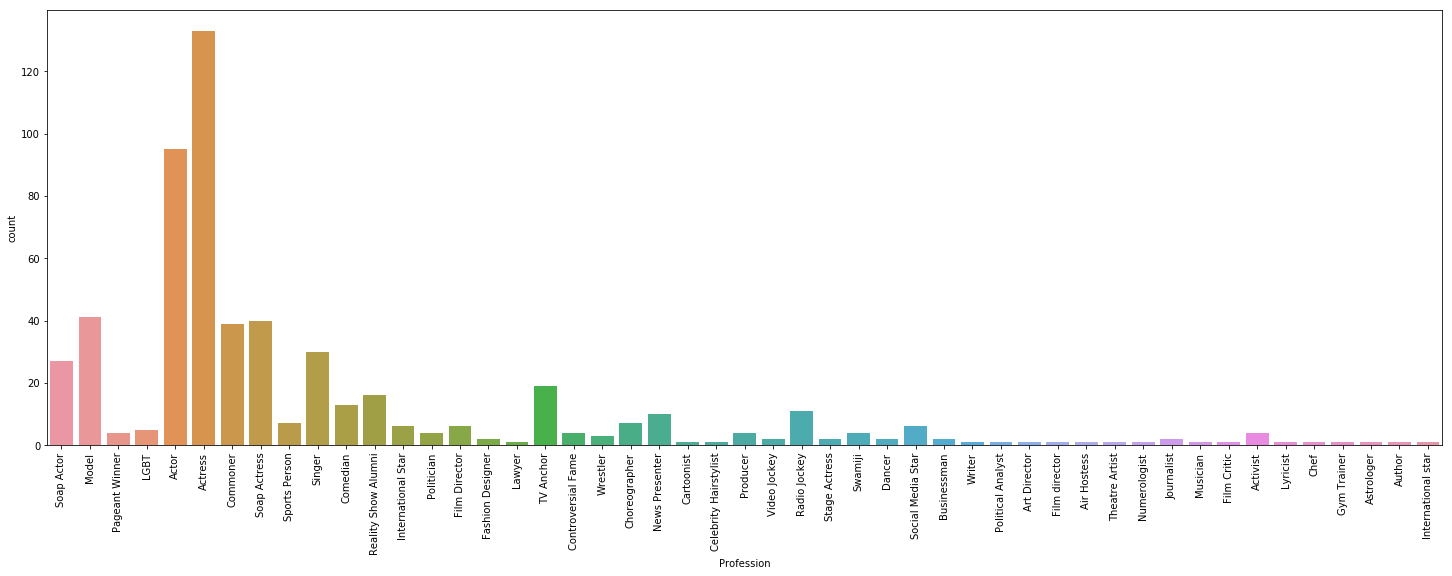

In [13]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(25,8))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

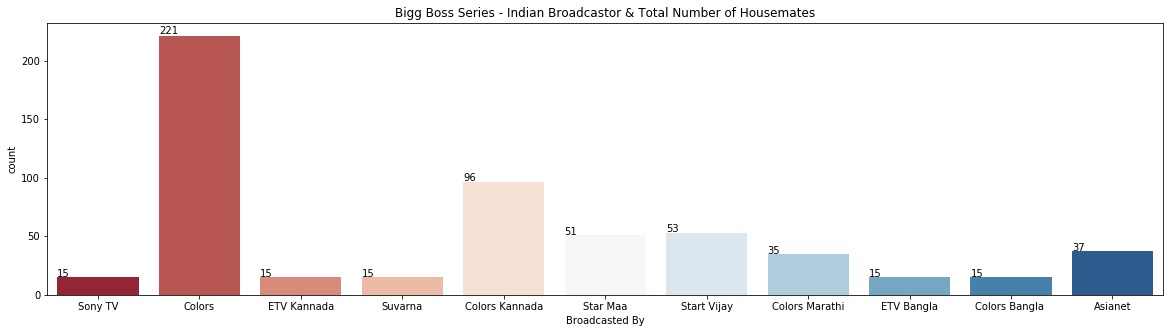

In [14]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts())


Female         297
Male           266
Transgender      5
Name: Gender, dtype: int64


In [16]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 11.03 

Language  Season Number
Malayalam              2


In [19]:
bigg_boss.loc[bigg_boss.Gender=='Transgender']

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,...,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Winner
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,...,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,0.0
63,Hindi,5,Laxmi Narayan Tripathi,LGBT,Transgender,02-Oct-11,NaN,6.0,No,98,...,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,0,Colors,4.19,1.0,0.0,0.0,0.0
322,Kannada,6,Adam Pasha,LGBT,Transgender,21-Oct-18,NaN,4.0,No,100,...,21-Oct-18,27-Jan-19,Sudeep,0,Colors Kannada,NaN,4.0,0.0,0.0,0.0
411,Telugu,3,Tamanna Simhadri,LGBT,Transgender,28-Jul-19,11-Aug-19,3.0,Yes,105,...,21-Jul-19,03-Nov-19,Nagarjuna,0,Star Maa,NaN,1.0,0.0,0.0,0.0
522,Bengali,2,Manabi Bandyopadhyay,LGBT,Transgender,04-Apr-16,NaN,NaN,No,97,...,04-Apr-16,15-Jul-16,Jeet,0,Colors Bangla,6.50,NaN,NaN,NaN,0.0


In [20]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  7
Actress                5
Singer                 4
Soap Actress           4
Reality Show Alumni    3
Commoner               2
TV Anchor              2
Film Director          1
Soap Actor             1
Model                  1
Name: Profession, dtype: int64

In [21]:
# Gender of Season title Winners
print(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(),'\n')

# In percentage
print(round(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(normalize=True)*100))

# Male      21
# Female     9

Male      21
Female     9
Name: Gender, dtype: int64 

Male      70.0
Female    30.0
Name: Gender, dtype: float64
